Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

Import Dataset

In [2]:
data = pd.read_csv('bank-full.csv', sep=';')
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [3]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
#Checking   Null values
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [6]:
#Unique position
col=data.columns
i=0
for i in range (0, len(col)):
    print(col[i])
    print(data[col[i]].unique())


age
[58 44 33 47 35 28 42 43 41 29 53 57 51 45 60 56 32 25 40 39 52 46 36 49
 59 37 50 54 55 48 24 38 31 30 27 34 23 26 61 22 21 20 66 62 83 75 67 70
 65 68 64 69 72 71 19 76 85 63 90 82 73 74 78 80 94 79 77 86 95 81 18 89
 84 87 92 93 88]
job
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
marital
['married' 'single' 'divorced']
education
['tertiary' 'secondary' 'unknown' 'primary']
default
['no' 'yes']
balance
[ 2143    29     2 ...  8205 14204 16353]
housing
['yes' 'no']
loan
['no' 'yes']
contact
['unknown' 'cellular' 'telephone']
day
[ 5  6  7  8  9 12 13 14 15 16 19 20 21 23 26 27 28 29 30  2  3  4 11 17
 18 24 25  1 10 22 31]
month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
duration
[ 261  151   76 ... 1298 1246 1556]
campaign
[ 1  2  3  5  4  6  7  8  9 10 11 12 13 19 14 24 16 32 18 22 15 17 25 21
 43 51 63 41 26 28 55 50 38 23 20 29 31 37 30 46 27

Replacing Unknown/Other values with NaN

In [7]:
data['job'] = data['job'].replace('unknown', np.nan)
data.job.unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar', nan,
       'retired', 'admin.', 'services', 'self-employed', 'unemployed',
       'housemaid', 'student'], dtype=object)

In [8]:
data['education'] = data['education'].replace('unknown', np.nan)
data.education.unique()

array(['tertiary', 'secondary', nan, 'primary'], dtype=object)

In [9]:
data['poutcome'] = data['poutcome'].replace(['unknown', 'other'], np.nan)
data.poutcome.unique()

array([nan, 'failure', 'success'], dtype=object)

In [10]:
data=data.drop('contact',axis=1)
data=data.drop('marital',axis=1)
data

,age,job,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,tertiary,no,2143,yes,no,5,may,261,1,-1,0,NaN,no
1,44,technician,secondary,no,29,yes,no,5,may,151,1,-1,0,NaN,no
2,33,entrepreneur,secondary,no,2,yes,yes,5,may,76,1,-1,0,NaN,no
3,47,blue-collar,NaN,no,1506,yes,no,5,may,92,1,-1,0,NaN,no
4,33,NaN,NaN,no,1,no,no,5,may,198,1,-1,0,NaN,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,tertiary,no,825,no,no,17,nov,977,3,-1,0,NaN,yes
45207,71,retired,primary,no,1729,no,no,17,nov,456,2,-1,0,NaN,yes
45208,72,retired,secondary,no,5715,no,no,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,secondary,no,668,no,no,17,nov,508,4,-1,0,NaN,no


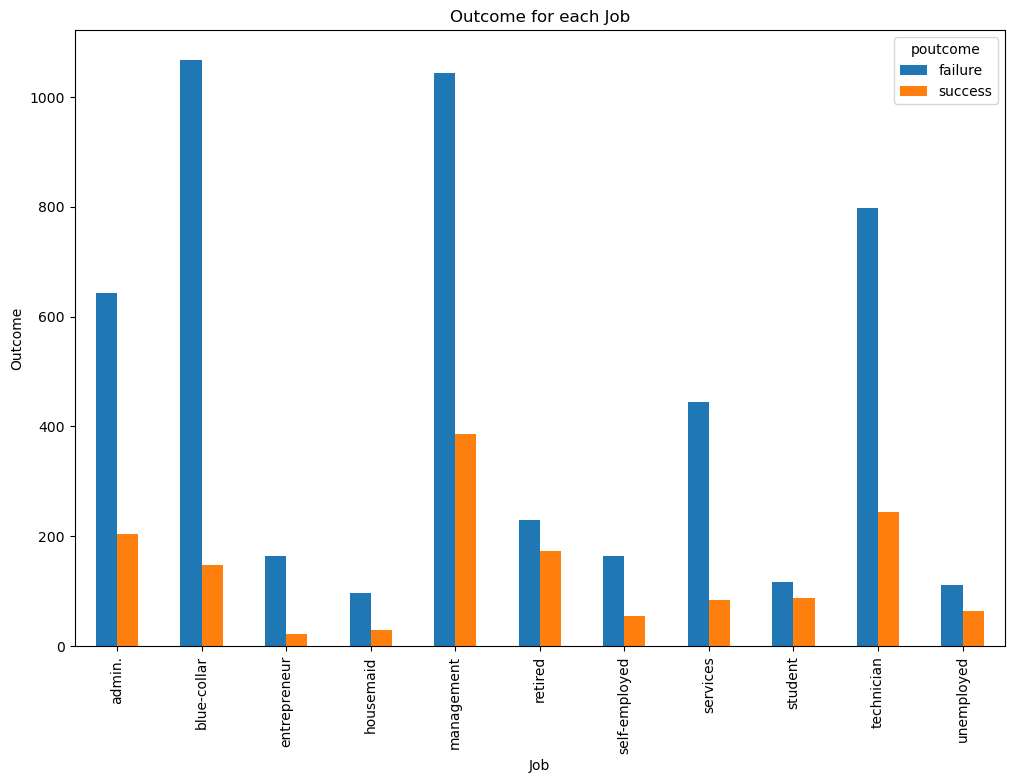

In [11]:
data_grp1 = data.groupby(['job','poutcome']).size().unstack()
data_grp1.plot(kind='bar',figsize=(12,8))
plt.xlabel('Job')
plt.ylabel('Outcome')
plt.title('Outcome for each Job')
plt.show()

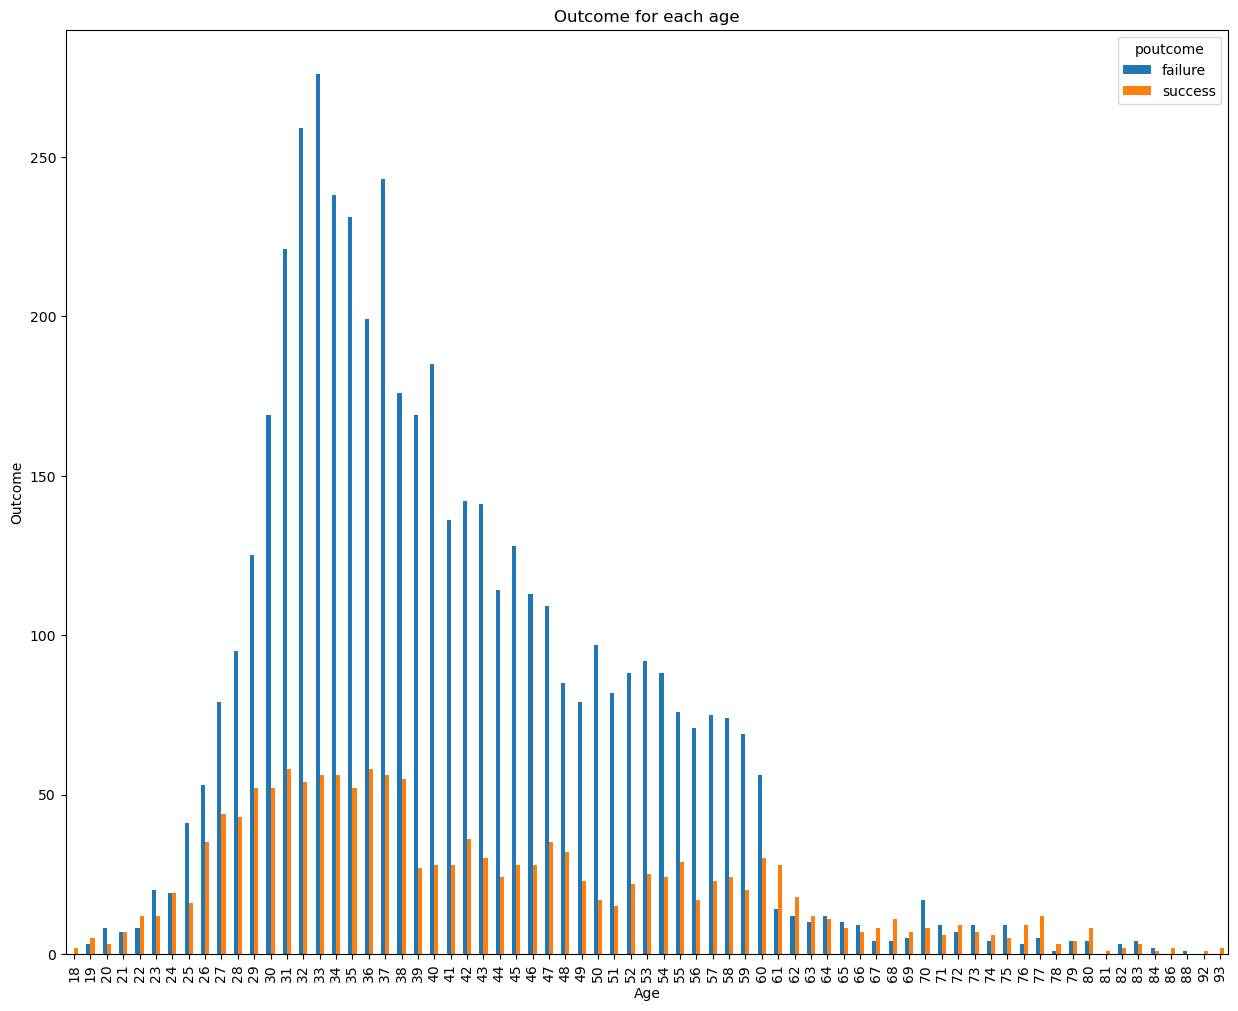

In [12]:
data_grp2 = data.groupby(['age','poutcome']).size().unstack()
data_grp2.plot(kind='bar',figsize=(15,12))
plt.xlabel('Age')
plt.ylabel('Outcome')
plt.title('Outcome for each age')
plt.show()

In [13]:
data['poutcome'].value_counts()

poutcome
failure    4901
success    1511
Name: count, dtype: int64

Replacing NaN values with mode value

In [14]:
data['job'].fillna(data['job'].mode()[0], inplace=True)
data['job'].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'retired', 'admin.', 'services', 'self-employed', 'unemployed',
       'housemaid', 'student'], dtype=object)

In [15]:
data['education'].fillna(data['education'].mode()[0], inplace=True)
data['education'].unique()

array(['tertiary', 'secondary', 'primary'], dtype=object)

Select independent variable

In [16]:
X = data[['age','job','education','default','balance','housing','loan','day','month','duration','campaign','pdays','previous','poutcome']]
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   education  45211 non-null  object
 3   default    45211 non-null  object
 4   balance    45211 non-null  int64 
 5   housing    45211 non-null  object
 6   loan       45211 non-null  object
 7   day        45211 non-null  int64 
 8   month      45211 non-null  object
 9   duration   45211 non-null  int64 
 10  campaign   45211 non-null  int64 
 11  pdays      45211 non-null  int64 
 12  previous   45211 non-null  int64 
 13  poutcome   6412 non-null   object
dtypes: int64(7), object(7)
memory usage: 4.8+ MB


Perform Standard Scaling

In [17]:
X = data.drop(data.select_dtypes(include=['object']), axis=1)
cols=X.columns
cols

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')

In [18]:
scaler = StandardScaler()
X[cols] = scaler.fit_transform(X[cols])
X

,age,balance,day,duration,campaign,pdays,previous
0,1.606965,0.256419,-1.298476,0.011016,-0.569351,-0.411453,-0.251940
1,0.288529,-0.437895,-1.298476,-0.416127,-0.569351,-0.411453,-0.251940
2,-0.747384,-0.446762,-1.298476,-0.707361,-0.569351,-0.411453,-0.251940
3,0.571051,0.047205,-1.298476,-0.645231,-0.569351,-0.411453,-0.251940
4,-0.747384,-0.447091,-1.298476,-0.233620,-0.569351,-0.411453,-0.251940
...,...,...,...,...,...,...,...
45206,0.947747,-0.176460,0.143418,2.791329,0.076230,-0.411453,-0.251940
45207,2.831227,0.120447,0.143418,0.768224,-0.246560,-0.411453,-0.251940
45208,2.925401,1.429593,0.143418,3.373797,0.721811,1.436189,1.050473
45209,1.512791,-0.228024,0.143418,0.970146,0.399020,-0.411453,-0.251940


Select a Target variable

In [19]:
y = data[['y']]
y

,y
0,no
1,no
2,no
3,no
4,no
...,...
45206,yes
45207,yes
45208,yes
45209,no


Split the dataset into train and test models

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [21]:
X_train

,age,balance,day,duration,campaign,pdays,previous
33362,-0.182341,0.823628,0.503892,-0.722893,-0.569351,-0.411453,-0.251940
28229,-0.935732,-0.095007,1.585313,-0.684062,-0.569351,-0.411453,-0.251940
37952,-0.464863,-0.156425,-0.217055,0.403211,1.044601,-0.411453,-0.251940
43408,-2.065820,-0.318016,-1.298476,0.267302,0.076230,-0.411453,-0.251940
9897,0.382703,-0.447419,-0.817845,-0.614166,-0.569351,-0.411453,-0.251940
...,...,...,...,...,...,...,...
30403,-0.559037,-0.120625,-1.298476,-0.851036,-0.569351,-0.411453,-0.251940
21243,-0.559037,-0.201092,0.263576,-0.097711,2.981343,-0.411453,-0.251940
42613,-0.559037,-0.341334,-0.577529,0.011016,-0.246560,-0.411453,-0.251940
43567,2.737053,-0.245103,1.344997,-0.423893,-0.246560,1.416214,0.182198


In [22]:
X_test

,age,balance,day,duration,campaign,pdays,previous
14001,-0.370689,0.013377,-0.697687,-0.649114,3.949713,-0.411453,-0.251940
32046,-0.464863,-0.530514,-0.217055,3.164108,-0.569351,-0.411453,-0.251940
13318,0.571051,-0.580764,-0.938003,-0.058880,0.721811,-0.411453,-0.251940
42991,1.512791,-0.282873,-0.577529,-0.594750,1.367391,1.476138,0.616335
14237,-0.747384,-0.580764,-0.217055,0.286718,-0.246560,-0.411453,-0.251940
...,...,...,...,...,...,...,...
9953,-0.370689,0.837751,-0.817845,-0.707361,-0.246560,-0.411453,-0.251940
37898,-0.464863,-0.535112,-0.217055,-0.618049,1.367391,3.114047,0.182198
1080,-0.370689,-0.447419,-1.058161,-0.567569,0.399020,-0.411453,-0.251940
17950,0.006007,-0.238534,1.705471,-0.691828,-0.246560,-0.411453,-0.251940


In [23]:
y_train

,y
33362,no
28229,no
37952,no
43408,yes
9897,no
...,...
30403,no
21243,no
42613,yes
43567,no


In [24]:
y_test

,y
14001,no
32046,yes
13318,no
42991,no
14237,no
...,...
9953,no
37898,no
1080,no
17950,no


Build ML model [Decision Tree]

In [25]:
# Initialize your model
model = DecisionTreeClassifier(random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the training set
train_predictions = model.predict(X_train)

# Make predictions on the testing set
test_predictions = model.predict(X_test)

# Calculate training accuracy
DecisionTreeClassifier_train_accuracy = accuracy_score(y_train, train_predictions)
print(f'Training Accuracy: {DecisionTreeClassifier_train_accuracy}')

# Calculate testing accuracy
DecisionTreeClassifier_test_accuracy = accuracy_score(y_test, test_predictions)
print(f'Testing Accuracy: {DecisionTreeClassifier_test_accuracy}')

print("\nClassification Report (Training Data):")
print(classification_report(y_train, train_predictions))

print("\nClassification Report (Testing Data):")
print(classification_report(y_test, test_predictions))

Training Accuracy: 1.0
Testing Accuracy: 0.8490666194815536

Classification Report (Training Data):
              precision    recall  f1-score   support

          no       1.00      1.00      1.00     29944
         yes       1.00      1.00      1.00      3964

    accuracy                           1.00     33908
   macro avg       1.00      1.00      1.00     33908
weighted avg       1.00      1.00      1.00     33908


Classification Report (Testing Data):
              precision    recall  f1-score   support

          no       0.92      0.91      0.91      9978
         yes       0.37      0.39      0.38      1325

    accuracy                           0.85     11303
   macro avg       0.64      0.65      0.65     11303
weighted avg       0.85      0.85      0.85     11303



In [26]:
# Print the results
print("DecisionTreeClassifier:")
print(f'Training Accuracy: {DecisionTreeClassifier_train_accuracy}')
print(f'Testing Accuracy: {DecisionTreeClassifier_test_accuracy}\n')

DecisionTreeClassifier:
Training Accuracy: 1.0
Testing Accuracy: 0.8490666194815536

